# In this notebook we will start with the basic method of SENTIMENT ANALYSIS.


# Problem statement: Given a customer review can we predict the rating of the review (1-5). 1 being negative and 5 being positive.

# We will try using bag of words model for this experiment and traditional ML algorithms to predict the outcome.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re # regex lib for cleaning
from nltk.corpus import stopwords # list of stopwords
from nltk.stem import WordNetLemmatizer # for lemmatizing (years to year)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler #undersampling
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import classification_report # precision, recall, f1

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone_project/cleaned_reviews.csv')
df.head()

,cleaned_reviews,rating
0,excellent,5
1,dog become healthy thank,5
2,quality service everyone happy,5
3,went top dog raw food morning first time amazi...,5
4,very stylish site enough information make choi...,5


## The length of each review is counted and stored in count. 
## empty countains the index of reviews having length=0 after cleaning the reviews.
## The empty reviews are dropped from the DataFrame.

In [4]:
count = []
for val in df['cleaned_reviews']:
    count.append(len(val.split()))

In [5]:
len(count)

1194697

# Histogram for the length of the reviews. Based on the max frequency of reviews the length of the reviews will be considered.

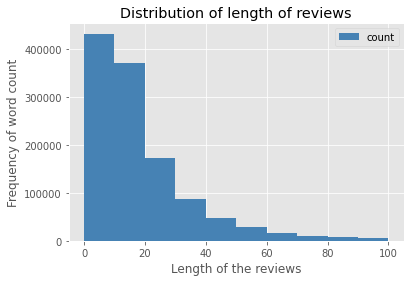

In [6]:
sent_len = pd.DataFrame({'count':count})
sent_len.plot(kind='hist', figsize=(6, 4), color='steelblue',bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title('Distribution of length of reviews')
plt.ylabel('Frequency of word count')
plt.xlabel('Length of the reviews')

plt.show()

### Distribution of the target variable containing 5 categories.

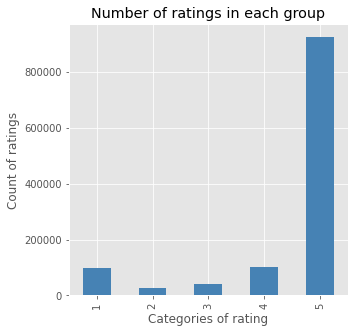

In [7]:
ratings = pd.value_counts(df['rating'], sort=False)
ratings.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()

# 82% of reviews have length upto 30 words.

In [8]:
cnt, edg = np.histogram(sent_len,bins = [0,10,20,30,40,50,60,70,80,90,100])
(cnt[0] + cnt[1] + cnt[2])/sum(cnt)

0.8275089153581621

### For the first model we will consider first 10 words of each reviews.

In [9]:
# max len of reviews to 10
review_len10 = []
for rev in df['cleaned_reviews']:
    rev = rev.split()
    review_len10.append(' '.join(rev[0:10]))
review_len10[4]

'very stylish site enough information make choice buy pet happy'

# Creating Bag of words model.

## Limiting the no. features to 500. It is expensive to create features using bag of words that treats each new word as a feature.

In [23]:
Cnt_vec = CountVectorizer(max_features=500)

## Creates an array using Bag of words.

In [24]:
bag_words = Cnt_vec.fit_transform(df['cleaned_reviews']).toarray()

In [25]:
np.savez_compressed('bow_data.npz', bag_words)

In [26]:
# Target variable 
y_rating = df['rating'].to_numpy()
np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/target_data.npz', y_rating)


In [27]:
print('shape of feature matrix:',bag_words.shape,'shape of target variable', y_rating.shape)

shape of feature matrix: (1194697, 500) shape of target variable (1194697,)


## Creates an array using TF_IDF.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#limiting features to 500
tf_idf = TfidfVectorizer(max_features=500)

In [12]:
bow_tf_idf = tf_idf.fit_transform(df['cleaned_reviews']).toarray()

np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/tf_idf_data.npz', bow_tf_idf)

## Creates Bigrams using bow

In [15]:
Cnt_vec = CountVectorizer(max_features=500, ngram_range=(1,2))

bi_grm_bow = Cnt_vec.fit_transform(df['cleaned_reviews']).toarray()

np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/bi_grm_bow_data.npz', bi_grm_bow)

## Creates Bigrams using Tf_idf

In [11]:
tf_idf = TfidfVectorizer(max_features=500, ngram_range=(1,2))

bi_grm_tf_idf = tf_idf.fit_transform(df['cleaned_reviews']).toarray()

np.savez_compressed('/content/drive/My Drive/Colab Notebooks/Capstone_project/bi_grm_tf_idf_data.npz', bi_grm_tf_idf)

In [ ]:
# Undersampling object
rus = RandomUnderSampler(sampling_strategy={1:26000,2:26000,3:26000,4:26000,5:26000},random_state=0)
def under_sample(x,y):
    
    X_resampled, y_resampled = rus.fit_resample(x,y)
    return X_resampled, y_resampled

In [ ]:
X_resampled, y_resampled = under_sample(bag_words[0:1189697,], y_rating[0:1189697])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Test data 
X_test, y_test = bag_words[1189697:,] , y_rating[1189697:]

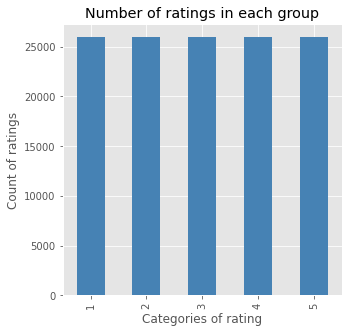

In [ ]:
dis = pd.value_counts(y_resampled, sort=False)
dis.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [ ]:
X_resampled,y_resampled= under_sample(bow_tf_idf[0:1189697,], y_rating[0:1189697])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf_dt = DecisionTreeClassifier(random_state=0)

In [ ]:
clf_dt = clf_dt.fit(X_resampled,y_resampled)

In [ ]:
X_test_dt, y_test_dt = bow_tf_idf[1189697:,] , y_rating[1189697:]

In [ ]:
pred_dt = clf_dt.predict(X_test_dt)

In [ ]:
print(confusion_matrix(y_test_dt, pred_dt))

[[ 188  100   88   60   41]
 [  38   39   26   28   18]
 [  36   48   48   53   34]
 [  62   73  111  132  128]
 [ 318  494  621  934 1282]]


In [ ]:
print(classification_report(y_test_dt, pred_dt))

              precision    recall  f1-score   support

           1       0.29      0.39      0.34       477
           2       0.05      0.26      0.09       149
           3       0.05      0.22      0.09       219
           4       0.11      0.26      0.15       506
           5       0.85      0.35      0.50      3649

    accuracy                           0.34      5000
   macro avg       0.27      0.30      0.23      5000
weighted avg       0.67      0.34      0.42      5000



In [ ]:
print('parameters used:',clf_dt.get_params(),'\n' ,'tree depth:',clf_dt.get_depth(),'\n', 'no. leaves:',clf_dt.get_n_leaves())

parameters used: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'} 
 tree depth: 604 
 no. leaves: 48057


In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
# Creating the hyperparameter grid  
param_dist = {"max_depth":[50,110,600],"min_samples_split":[100,500,1500]} 

In [ ]:
tree = DecisionTreeClassifier() 

In [ ]:
tree_cv = GridSearchCV(tree, param_dist, cv = 3) 
  
tree_cv.fit(X_resampled,y_resampled) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'max_depth': 110, 'min_samples_split': 1500}
Best score is 0.3747076826479687


In [ ]:
#Tuned Decision Tree Parameters: {'min_samples_split': 1500, 'max_depth': 110}
#Best score is 0.3747076826479687

#Tuned Decision Tree Parameters: {'max_depth': 110, 'min_samples_split': 1500}
#Best score is 0.3747307597485618

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(random_state=0)

In [ ]:
clf_rf = clf_rf.fit(X_resampled,y_resampled)

In [ ]:
pred_dt = clf_rf.predict(X_test_dt)

In [ ]:
print(classification_report(y_test_dt, pred_dt))

In [ ]:
print('parameters used:',clf_rf.get_params(),'\n', 'no. leaves:',clf_rf.decision_path(X_resampled))